In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# 1. Get the Data

In [3]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [4]:
print(f"Number of training examples: {len(train_df)}")
print(f"Number of testing examples: {len(test_df)}")

Number of training examples: 1460
Number of testing examples: 1459


In [5]:
print(f"Shape of train data: {train_df.shape}")
print(f"Shape of test data: {test_df.shape}")

Shape of train data: (1460, 81)
Shape of test data: (1459, 80)


In [6]:
columns = list(test_df.columns)
target_col = set(train_df.columns) - set(test_df.columns)
print(f"Features:\n{columns}\n")
print(f"Target:\n{target_col}")

Features:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'

In [7]:
with open('/content/data_description.txt', 'r') as file:
    for line in file:
        print(line.strip())

MSSubClass: Identifies the type of dwelling involved in the sale.

20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Grvl	Gravel
Pave	Pave

# 2. Explore and Visualize the Data

In [8]:
full_df = pd.concat([train_df, test_df], axis=0)
full_df.shape

(2919, 81)

In [9]:
full_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [11]:
numeric_df = full_df.select_dtypes(include='number')
object_df = full_df.select_dtypes(include='object')

In [12]:
numeric_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [13]:
object_df.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,1153,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,879,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [14]:
na_columns = full_df.isna().sum()[full_df.isna().sum() > (0.1 * len(full_df))]
print(f"NA values:\n\n{na_columns}\n==================================\n")
print(f"Percentage of NA values above 10% of the data:\n\n{na_columns / len(full_df)}")

NA values:

LotFrontage     486
Alley          2721
MasVnrType     1766
FireplaceQu    1420
PoolQC         2909
Fence          2348
MiscFeature    2814
SalePrice      1459
dtype: int64

Percentage of NA values above 10% of the data:

LotFrontage    0.166495
Alley          0.932169
MasVnrType     0.605002
FireplaceQu    0.486468
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
SalePrice      0.499829
dtype: float64


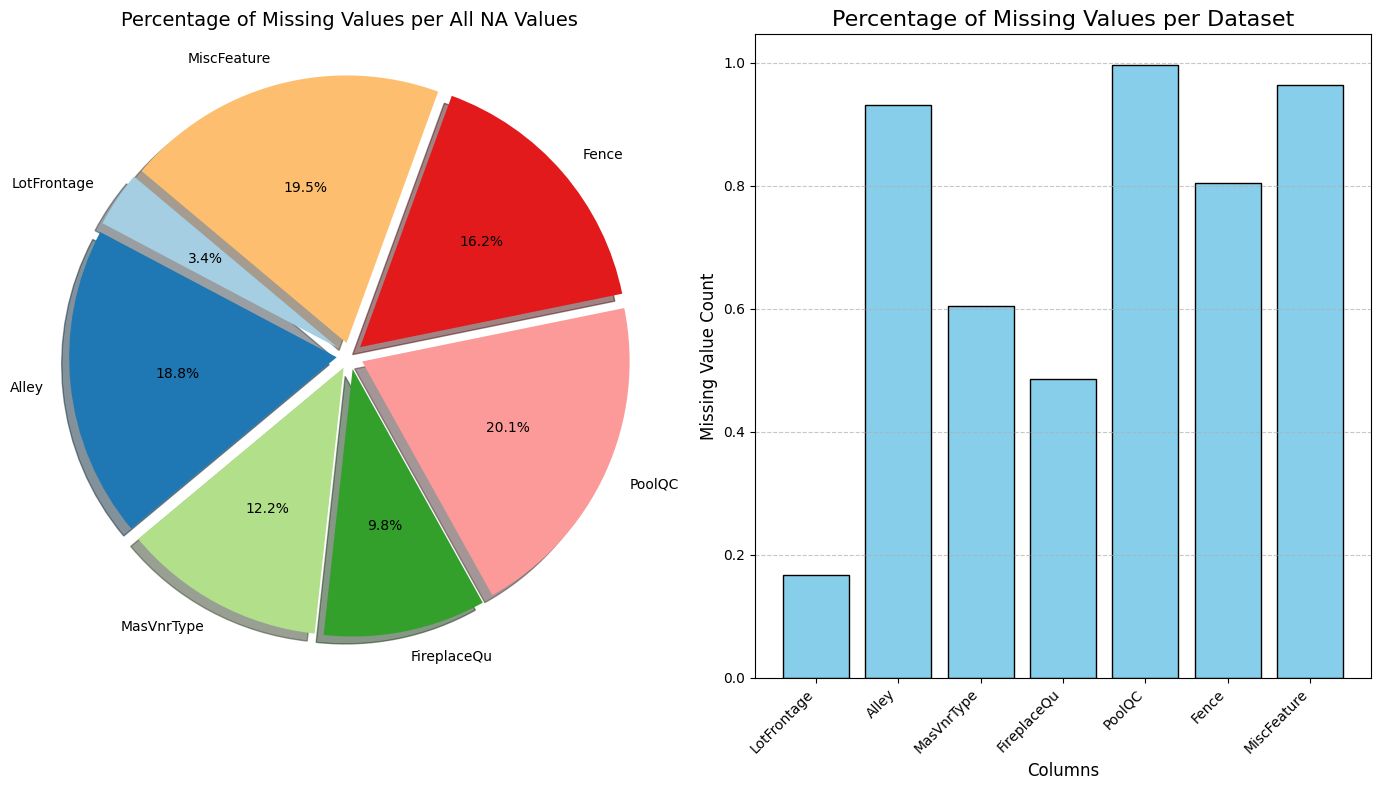

In [15]:
import matplotlib.pyplot as plt

values = na_columns.drop(["SalePrice"]).values
labels = na_columns.drop(["SalePrice"]).index

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    explode=[0.05] * len(values),
    colors=plt.cm.Paired.colors
)
plt.title('Percentage of Missing Values per All NA Values', fontsize=14)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.bar(labels, values / len(full_df), color='skyblue', edgecolor='black')
plt.title('Percentage of Missing Values per Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Value Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [16]:
full_df["PoolQC"].value_counts(dropna=False)

,count
PoolQC,
NaN,2909
Ex,4
Gd,4
Fa,2


In [17]:
for col in na_columns.drop("SalePrice").index:
    print(f"Percentage of NA values of {col} column in Train Data: {train_df[col].value_counts(dropna=False).iloc[0] / len(train_df)}")
    print(f"Percentage of NA values of {col} column in Test Data: {test_df[col].value_counts(dropna=False).iloc[0] / len(test_df)}")
    print(f"Percentage of NA values of {col} column in Full Data: {full_df[col].value_counts(dropna=False).iloc[0] / len(full_df)}")
    print("="*50)

Percentage of NA values of LotFrontage column in Train Data: 0.1773972602739726
Percentage of NA values of LotFrontage column in Test Data: 0.15558601782042494
Percentage of NA values of LotFrontage column in Full Data: 0.16649537512846865
Percentage of NA values of Alley column in Train Data: 0.9376712328767123
Percentage of NA values of Alley column in Test Data: 0.9266620973269363
Percentage of NA values of Alley column in Full Data: 0.9321685508735869
Percentage of NA values of MasVnrType column in Train Data: 0.5972602739726027
Percentage of NA values of MasVnrType column in Test Data: 0.6127484578478409
Percentage of NA values of MasVnrType column in Full Data: 0.605001712915382
Percentage of NA values of FireplaceQu column in Train Data: 0.4726027397260274
Percentage of NA values of FireplaceQu column in Test Data: 0.5003427004797807
Percentage of NA values of FireplaceQu column in Full Data: 0.48646796848235696
Percentage of NA values of PoolQC column in Train Data: 0.995205479

In [18]:
for col in na_columns.drop("SalePrice").index[1:]:
    print(full_df[col].value_counts(dropna=False))
    print("="*30)

Alley
NaN     2721
Grvl     120
Pave      78
Name: count, dtype: int64
MasVnrType
NaN        1766
BrkFace     879
Stone       249
BrkCmn       25
Name: count, dtype: int64
FireplaceQu
NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: count, dtype: int64
PoolQC
NaN    2909
Ex        4
Gd        4
Fa        2
Name: count, dtype: int64
Fence
NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: count, dtype: int64
MiscFeature
NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: count, dtype: int64


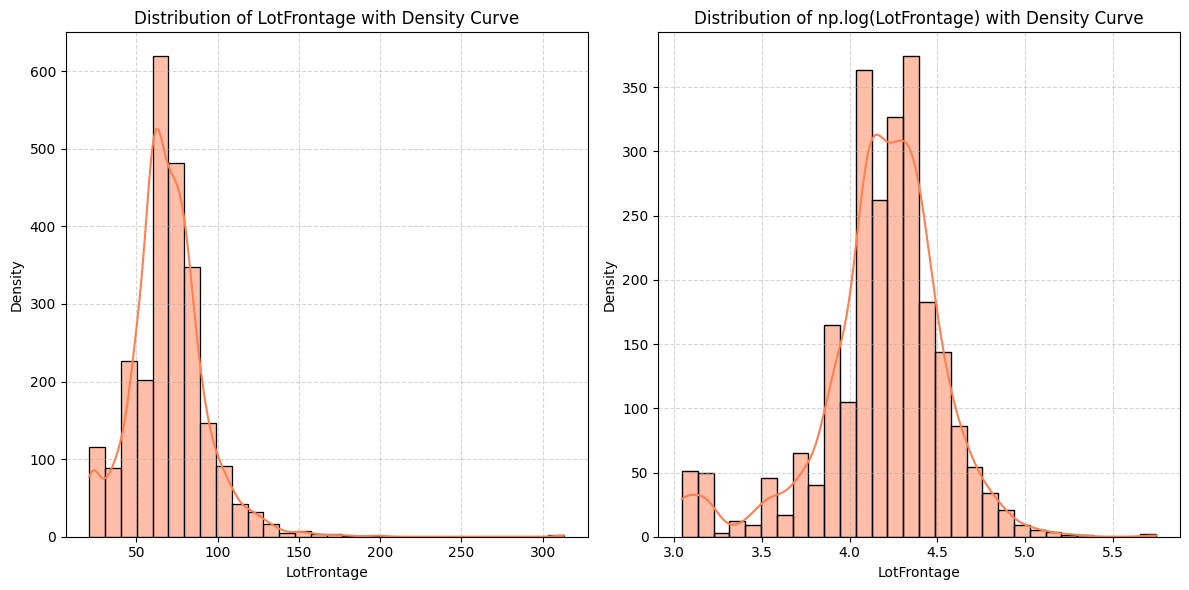

In [19]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(full_df["LotFrontage"], bins=30, kde=True, color="coral")
plt.title("Distribution of LotFrontage with Density Curve")
plt.xlabel("LotFrontage")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.histplot(np.log(full_df["LotFrontage"]), bins=30, kde=True, color="coral")
plt.title("Distribution of np.log(LotFrontage) with Density Curve")
plt.xlabel("LotFrontage")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
full_df.duplicated().sum()

np.int64(0)

In [21]:
duplicates = full_df.duplicated(subset=['Condition1', 'Condition2'])
print(f"Number of Duplicates Based on Condition1 and Condition2 Columns: {len(full_df[duplicates])}")
print(f"Number of Records: {len(full_df)}")

Number of Duplicates Based on Condition1 and Condition2 Columns: 2897
Number of Records: 2919


In [22]:
few_na_columns = full_df.isna().sum()[full_df.isna().sum() > 0]
few_na_columns = few_na_columns[full_df.isna().sum() <= 0.1 * len(full_df)]
few_na_columns

,0
MSZoning,4
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrArea,23
BsmtQual,81
BsmtCond,82
BsmtExposure,82
BsmtFinType1,79
BsmtFinSF1,1


In [23]:
for col in few_na_columns.index:
    print(full_df[col].value_counts(dropna=False))
    print("="*30)

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: count, dtype: int64
Utilities
AllPub    2916
NaN          2
NoSeWa       1
Name: count, dtype: int64
Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
NaN           1
Name: count, dtype: int64
Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: count, dtype: int64
MasVnrArea
0.0      1738
NaN        23
120.0      15
176.0      13
200.0      13
         ... 
355.0       1
405.0       1
327.0       1
257.0       1
382.0       1
Name: count, Length

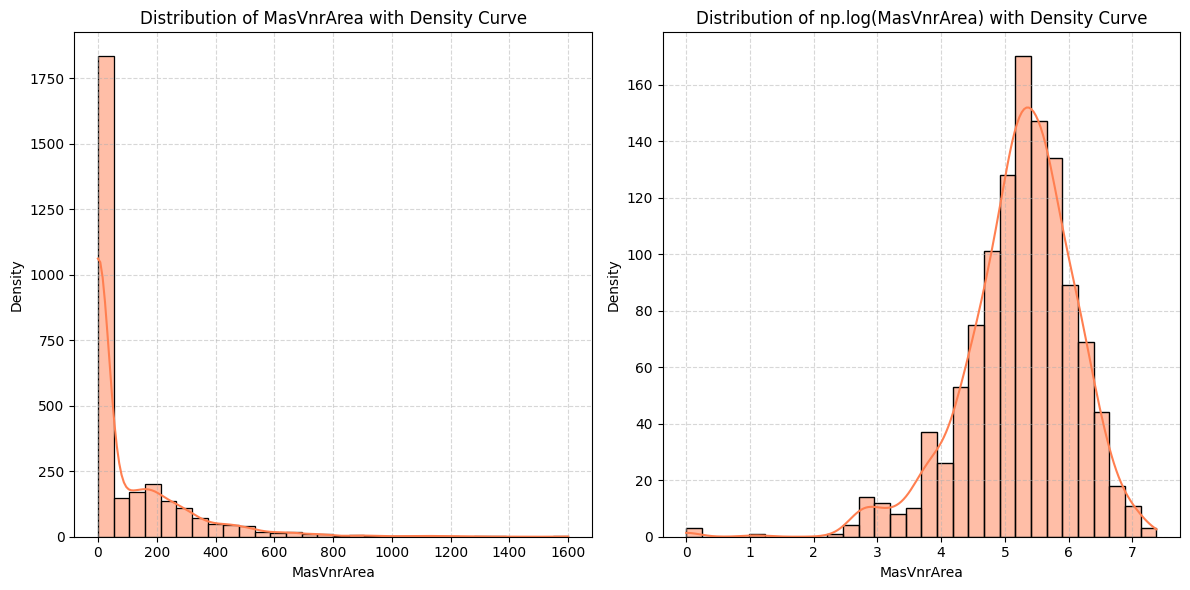

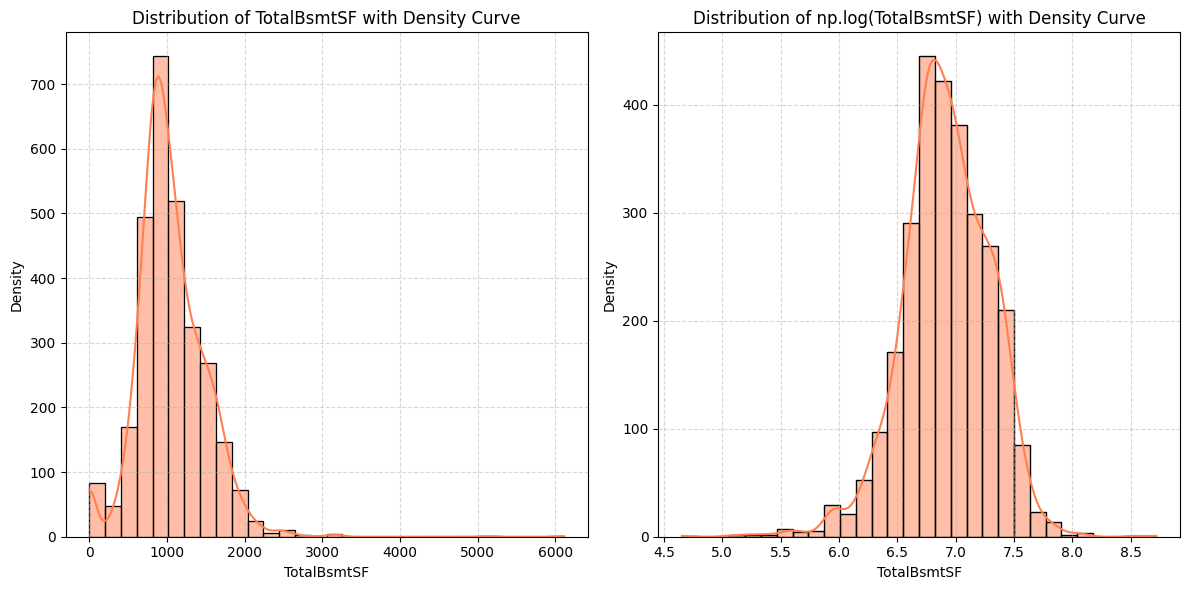

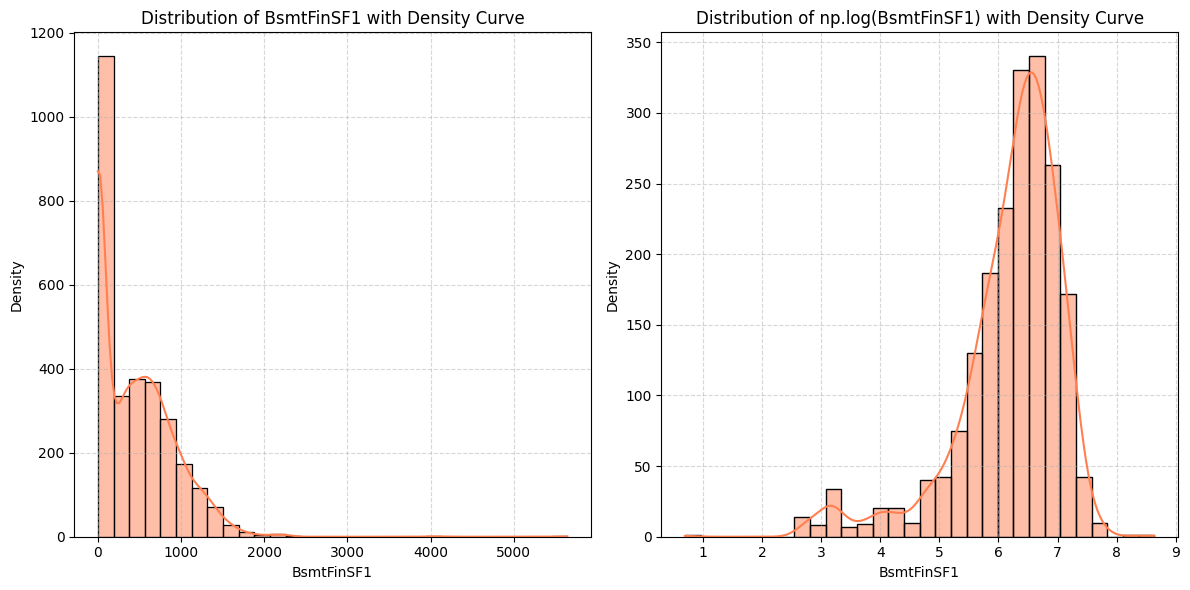

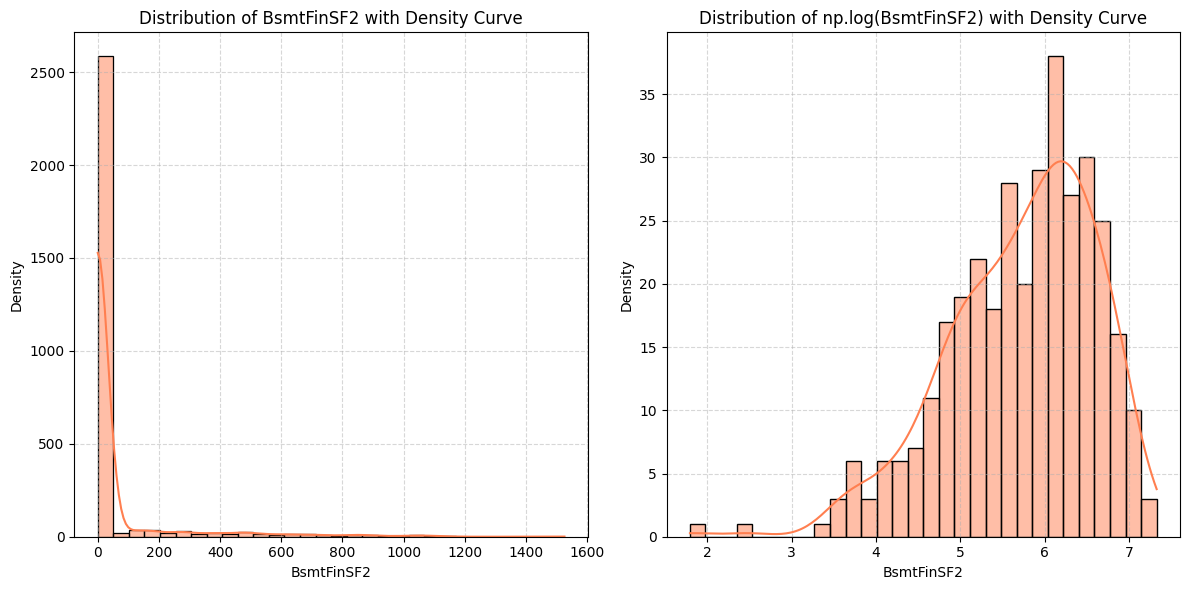

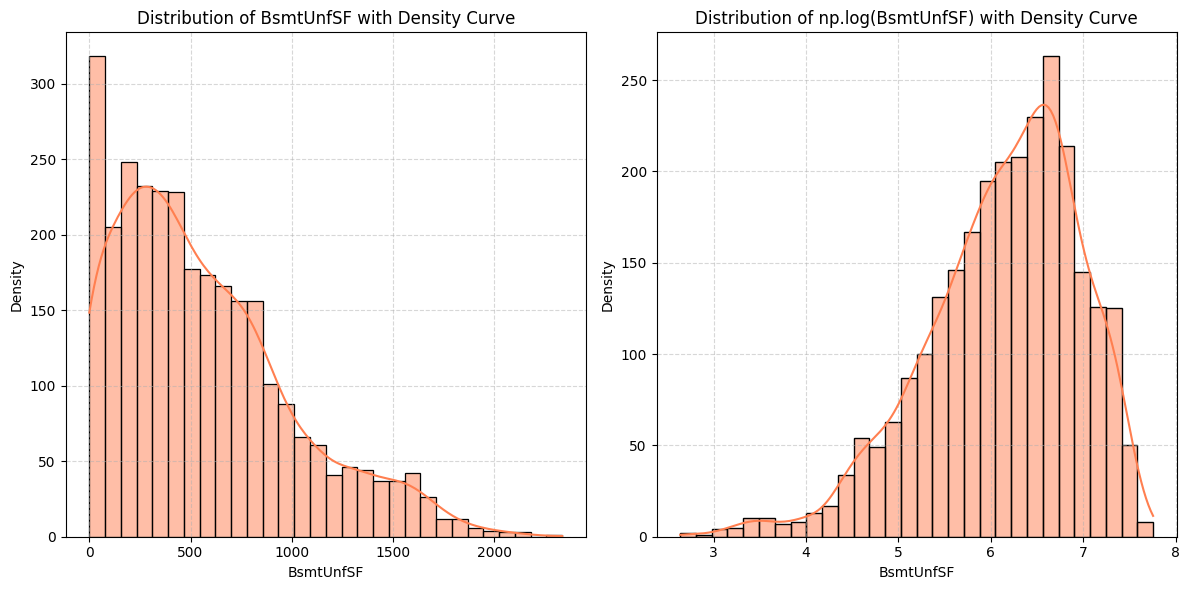

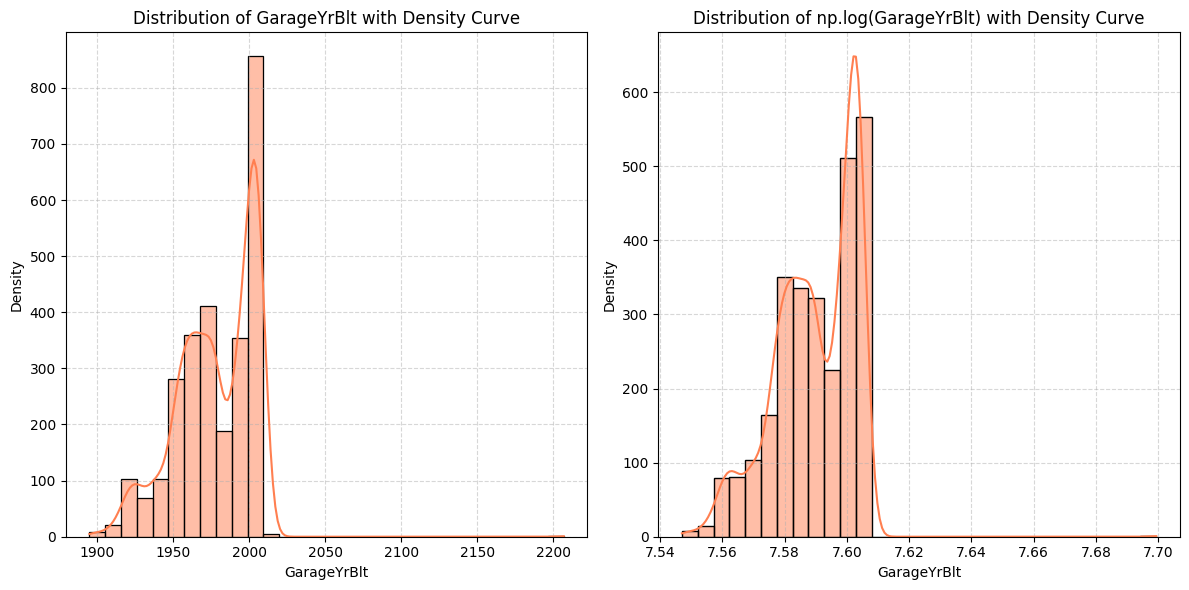

In [24]:
cols = ["MasVnrArea", "TotalBsmtSF", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "GarageYrBlt"]
for col in cols:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(full_df[col], bins=30, kde=True, color="coral")
    plt.title(f"Distribution of {col} with Density Curve")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    sns.histplot(np.log(full_df[col]), bins=30, kde=True, color="coral")
    plt.title(f"Distribution of np.log({col}) with Density Curve")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

### 💡 Insights:
- `LotFrontage` column have few NA values and need log transform on it, NA values will be the column `median`.
- `Street` and `Alley` columns are talking about the same thing and even same categories, but `Alley` records are almost full of NA values. We should drop `Alley` column.
- `PoolQC`, `Fence`, `MiscFeature` columns should be dropped because of their high percentage of NA values
- `MasVnrType` column have a lot of NA values which we can make from them `None` type category.
- In `FireplaceQu` column, NA values means there is no fireplace, so it gives a meaning and we should not drop it.
- `Condition1` and `Condition2` are duplicated columns. We should drop `Condition2` column and working on `Condition1` column.
- `Utilities` column has about one category, so we should drop it.
- `MSZoning`, `Exterior1st`, `Exterior2nd`, `Electrical`, `BsmtFullBath`, `BsmtHalfBath`, `KitchenQual`, `Functional`, `GarageCars`, `GarageArea`, `SaleType` columns' NA values should be substituted with `Mode` of each column.
- `GarageYrBlt` should be dropped.
- `MasVnrArea`, `TotalBsmtSF`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF` columns' NA values should be substituted with `0` and these columns need log transform.
- `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond` columns' NA values should be substituted with `NA` category.


# 3. Preprocess the Data

In [25]:
train_clean = train_df.copy()
test_clean = test_df.copy()

## 3.1 Data Cleaning

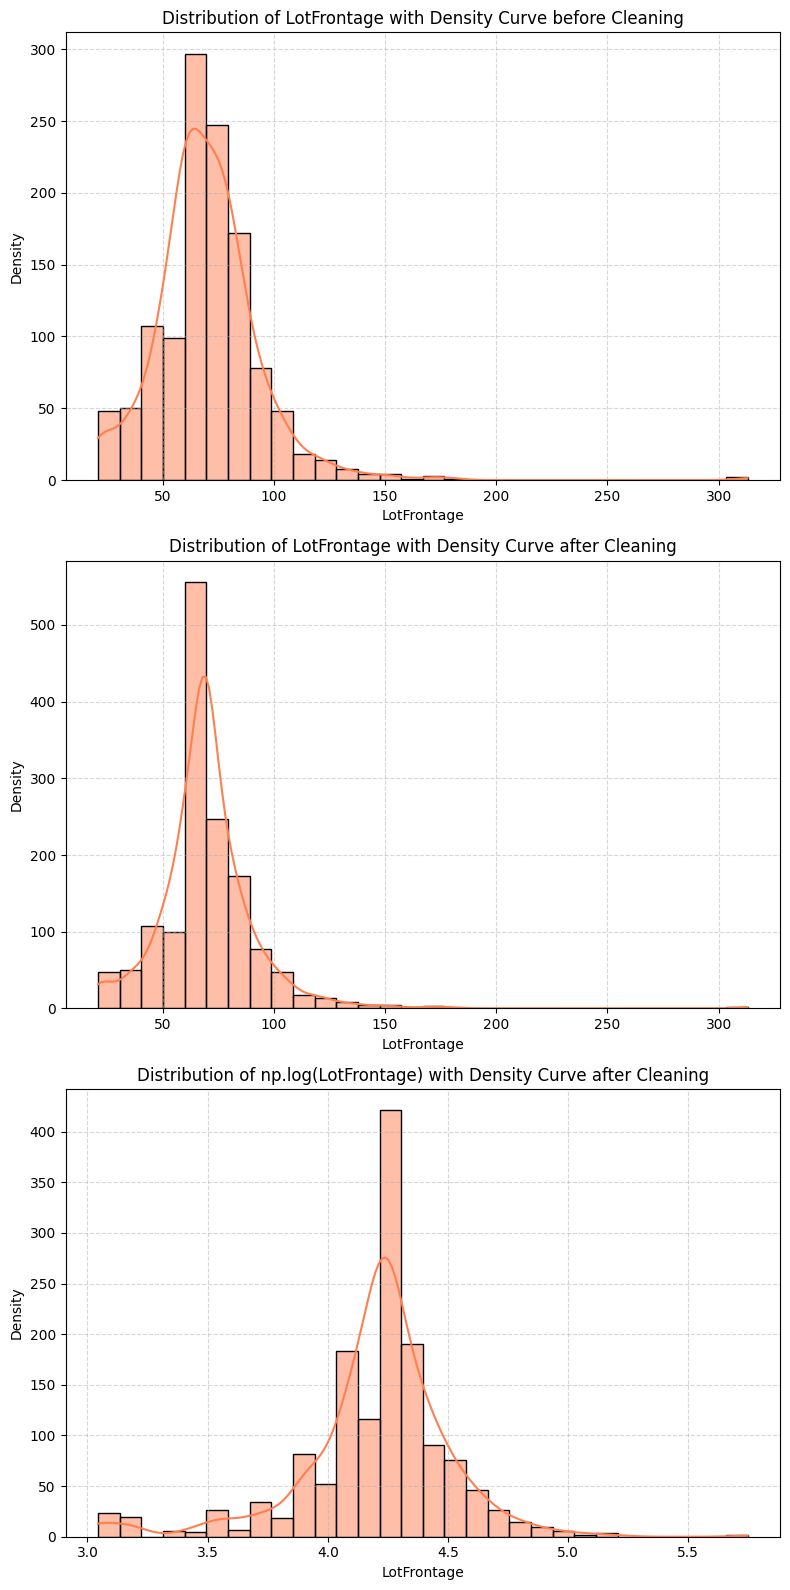

In [26]:
median_lotfrontage = train_clean["LotFrontage"].median()
train_clean["LotFrontage"] = train_clean["LotFrontage"].fillna(median_lotfrontage)
test_clean["LotFrontage"] = test_clean["LotFrontage"].fillna(median_lotfrontage)

plt.figure(figsize=(8, 16))
plt.subplot(3, 1, 1)
sns.histplot(train_df["LotFrontage"], bins=30, kde=True, color="coral")
plt.title("Distribution of LotFrontage with Density Curve before Cleaning")
plt.xlabel("LotFrontage")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.subplot(3, 1, 2)
sns.histplot(train_clean["LotFrontage"], bins=30, kde=True, color="coral")
plt.title("Distribution of LotFrontage with Density Curve after Cleaning")
plt.xlabel("LotFrontage")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.subplot(3, 1, 3)
sns.histplot(np.log(train_clean["LotFrontage"]), bins=30, kde=True, color="coral")
plt.title("Distribution of np.log(LotFrontage) with Density Curve after Cleaning")
plt.xlabel("LotFrontage")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [27]:
cols_to_drop = ["Id", "Alley", "PoolQC", "Fence", "MiscFeature", "Condition2", "Utilities", "GarageYrBlt"]
train_clean = train_clean.drop(cols_to_drop, axis=1)
test_clean = test_clean.drop(cols_to_drop, axis=1)

In [28]:
train_clean["MasVnrType"] = train_clean["MasVnrType"].fillna("None")
test_clean["MasVnrType"] = test_clean["MasVnrType"].fillna("None")

train_clean["MasVnrType"].value_counts(dropna=False)

,count
MasVnrType,
None,872
BrkFace,445
Stone,128
BrkCmn,15


In [29]:
cols_to_NA_category = ["FireplaceQu", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                       "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]

for col in cols_to_NA_category:
    train_clean[col] = train_clean[col].fillna("NA")
    test_clean[col] = test_clean[col].fillna("NA")

    print(train_clean[col].value_counts(dropna=False))
    print("="*30)

FireplaceQu
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
BsmtQual
TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: count, dtype: int64
BsmtCond
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: count, dtype: int64
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: count, dtype: int64
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: count, dtype: int64
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
GarageType
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
GarageFinish
Unf    605
RFn    422
Fin    352
NA      81
Name: count, dtype: int64
GarageQual
TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
GarageCond
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex   

In [30]:
cols_to_mode = ["MSZoning", "Exterior1st", "Exterior2nd", "Electrical", "BsmtFullBath", "BsmtHalfBath",
                "KitchenQual", "Functional", "GarageCars", "GarageArea", "SaleType"]

for col in cols_to_mode:
    mode = train_clean[col].mode()
    train_clean[col] = train_clean[col].fillna(mode[0])
    test_clean[col] = test_clean[col].fillna(mode[0])

    print(train_clean[col].value_counts(dropna=False))
    print("="*30)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64
Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64
Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64
BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64
BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64
Functional
Typ 

In [31]:
cols_to_zero = ["MasVnrArea", "TotalBsmtSF", "BsmtFinSF1",
                "BsmtFinSF2", "BsmtUnfSF"]

for col in cols_to_zero:
    train_clean[col] = train_clean[col].fillna(0)
    test_clean[col] = test_clean[col].fillna(0)

    print(train_clean[col].value_counts(dropna=False))
    print("="*30)

MasVnrArea
0.0      869
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
426.0      1
96.0       1
438.0      1
194.0      1
119.0      1
Name: count, Length: 327, dtype: int64
TotalBsmtSF
0       37
864     35
672     17
912     15
1040    14
        ..
1525     1
482      1
1542     1
839      1
1286     1
Name: count, Length: 721, dtype: int64
BsmtFinSF1
0       467
24       12
16        9
686       5
936       5
       ... 
203       1
309       1
408       1
1282      1
548       1
Name: count, Length: 637, dtype: int64
BsmtFinSF2
0       1293
180        5
374        3
93         2
287        2
        ... 
872        1
110        1
627        1
163        1
1029       1
Name: count, Length: 144, dtype: int64
BsmtUnfSF
0       118
728       9
384       8
300       7
572       7
       ... 
1252      1
709       1
734       1
503       1
616       1
Name: count, Length: 780, dtype: int64


In [32]:
concat = pd.concat([train_clean, test_clean], axis=0)
concat.isna().sum()[concat.isna().sum() > 0]

,0
SalePrice,1459


## 3.2 Data Encoding

In [33]:
cat_train_df = train_clean.select_dtypes(include="object")
cat_test_df = test_clean.select_dtypes(include="object")

print(f"Train Category Columns: \n{cat_train_df.columns}")
print(f"Test Category Columns: \n{cat_test_df.columns}")

Train Category Columns: 
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
Test Category Columns: 
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Heat

In [34]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
ord_enc.fit(train_clean.select_dtypes("object"))
cat_train_encoded = ord_enc.transform(train_clean.select_dtypes("object"))
cat_test_encoded = ord_enc.transform(test_clean.select_dtypes("object"))

In [35]:
cat_train_df.shape, cat_train_encoded.shape

((1460, 37), (1460, 37))

In [36]:
num_train_df = train_clean.select_dtypes(include="number")
num_test_df = test_clean.select_dtypes(include="number")

cat_train_encoded = pd.DataFrame(cat_train_encoded, columns=cat_train_df.columns)
train_encoded = pd.concat([num_train_df, cat_train_encoded], axis=1)

cat_test_encoded = pd.DataFrame(cat_test_encoded, columns=cat_train_df.columns)
test_encoded = pd.concat([num_test_df, cat_test_encoded], axis=1)

train_encoded.shape, test_encoded.shape

((1460, 73), (1459, 72))

In [37]:
train_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,3.0,1.0,3.0,3.0,4.0,0.0,5.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,3.0,1.0,3.0,3.0,2.0,0.0,24.0,1.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,6.0,1.0,0.0,1.0,4.0,3.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,3.0,1.0,0.0,3.0,4.0,0.0,5.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,3.0,1.0,0.0,3.0,0.0,0.0,6.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,4.0,1.0,4.0,0.0,6.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,8.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,3.0,1.0,0.0,3.0,2.0,0.0,15.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0


## 3.3 Data Transformation

### 3.3.1 Log Transform

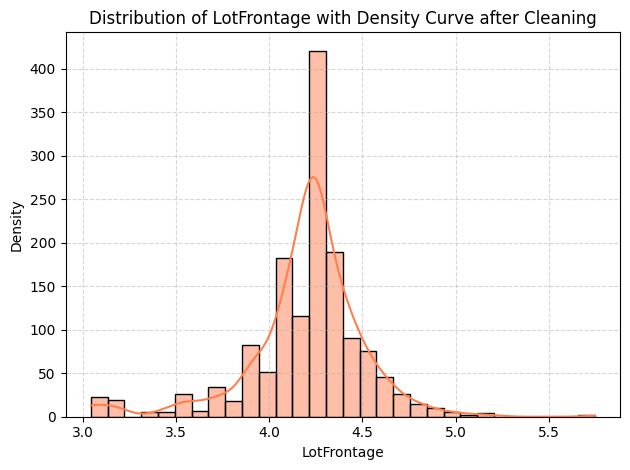

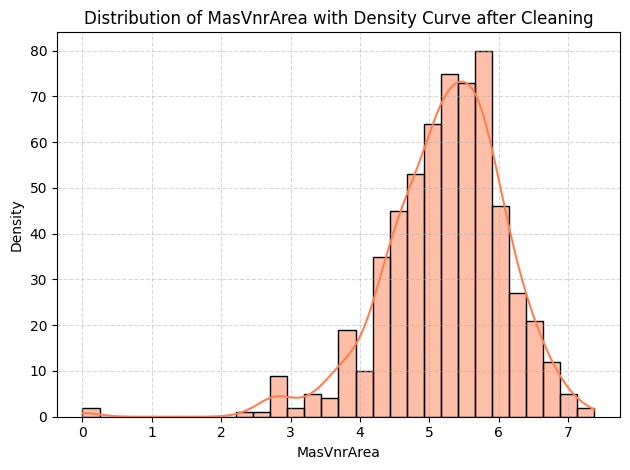

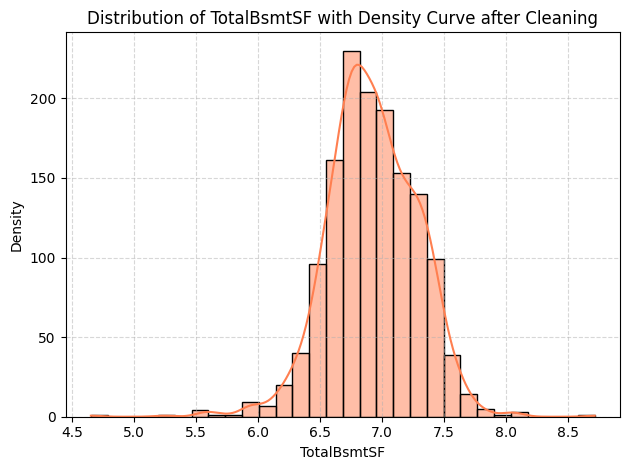

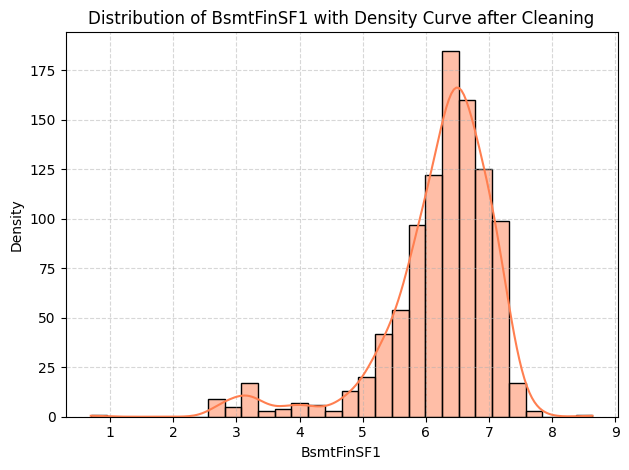

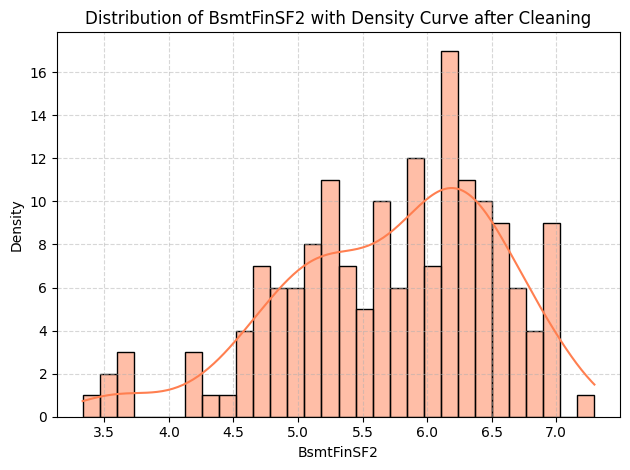

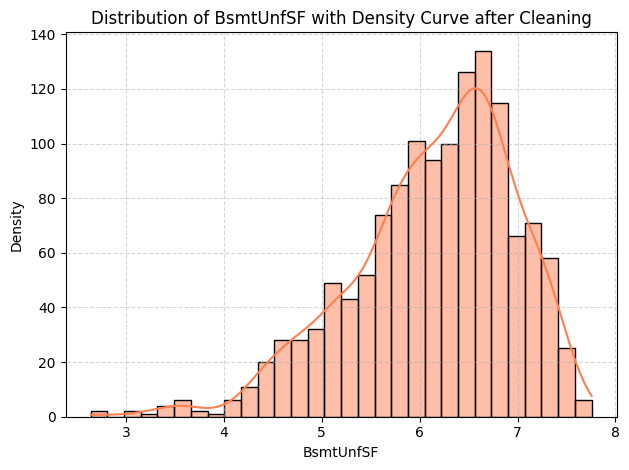

In [38]:
cols_to_log = ["LotFrontage", "MasVnrArea", "TotalBsmtSF",
               "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"]

for col in cols_to_log:
    train_encoded[col] = np.log(train_encoded[col])
    test_encoded[col] = np.log(test_encoded[col])

    sns.histplot(train_encoded[col], bins=30, kde=True, color="coral")
    plt.title(f"Distribution of {col} with Density Curve after Cleaning")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(num_train_df.drop("SalePrice", axis=1))
num_train_scaled = scaler.transform(num_train_df.drop("SalePrice", axis=1))
num_test_scaled = scaler.transform(num_test_df)

In [40]:
num_train_transformed = pd.DataFrame(num_train_scaled, columns=num_train_df.columns[:-1])
num_test_transformed = pd.DataFrame(num_test_scaled, columns=num_test_df.columns)

train_transformed = pd.concat([num_train_transformed, num_train_df["SalePrice"], cat_train_encoded], axis=1)
test_transformed = pd.concat([num_test_transformed, cat_test_encoded], axis=1)

train_transformed.shape, test_transformed.shape

((1460, 73), (1459, 72))

In [41]:
train_transformed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,208500,3.0,1.0,3.0,3.0,4.0,0.0,5.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,181500,3.0,1.0,3.0,3.0,2.0,0.0,24.0,1.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,6.0,1.0,0.0,1.0,4.0,3.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,223500,3.0,1.0,0.0,3.0,4.0,0.0,5.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,140000,3.0,1.0,0.0,3.0,0.0,0.0,6.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,4.0,1.0,4.0,0.0,6.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,250000,3.0,1.0,0.0,3.0,2.0,0.0,15.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0


## 3.4 Data Correlation

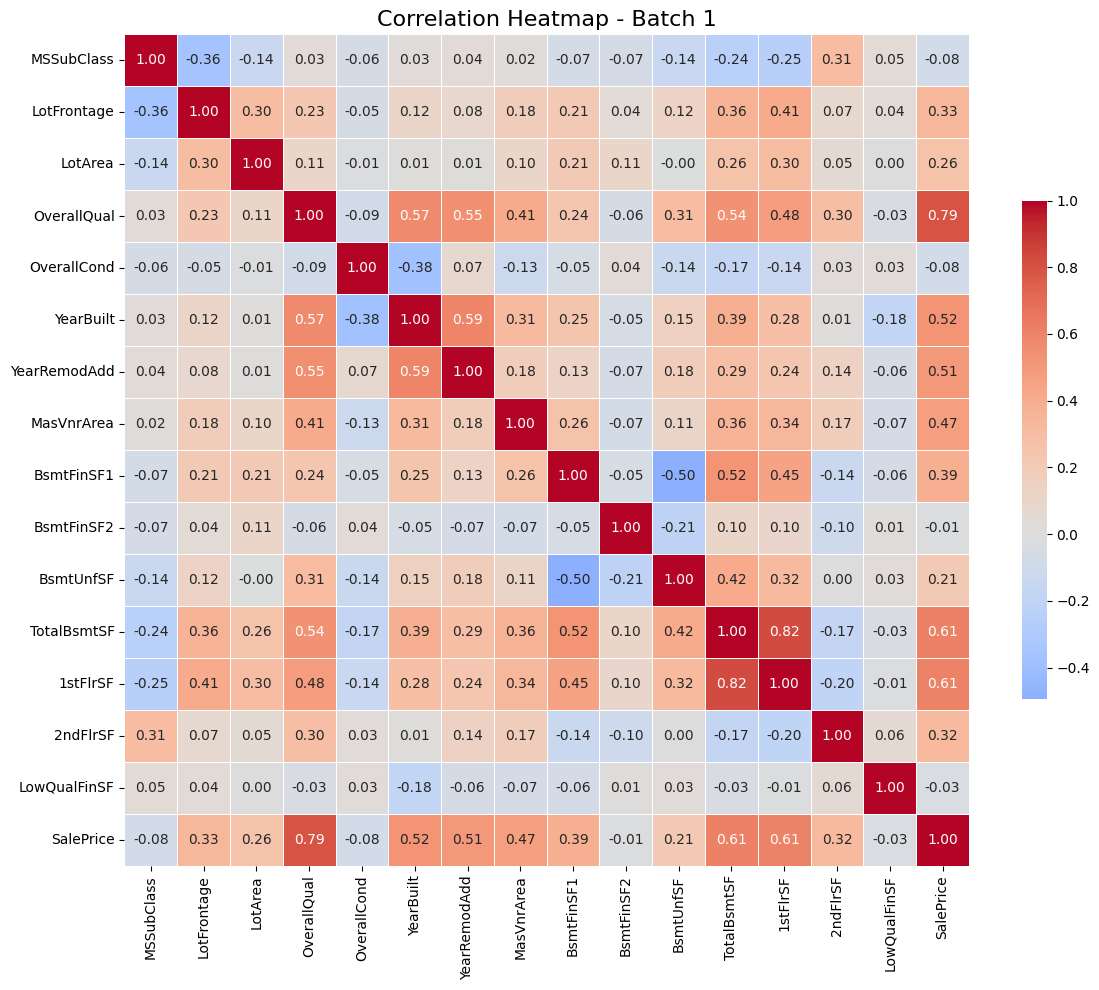

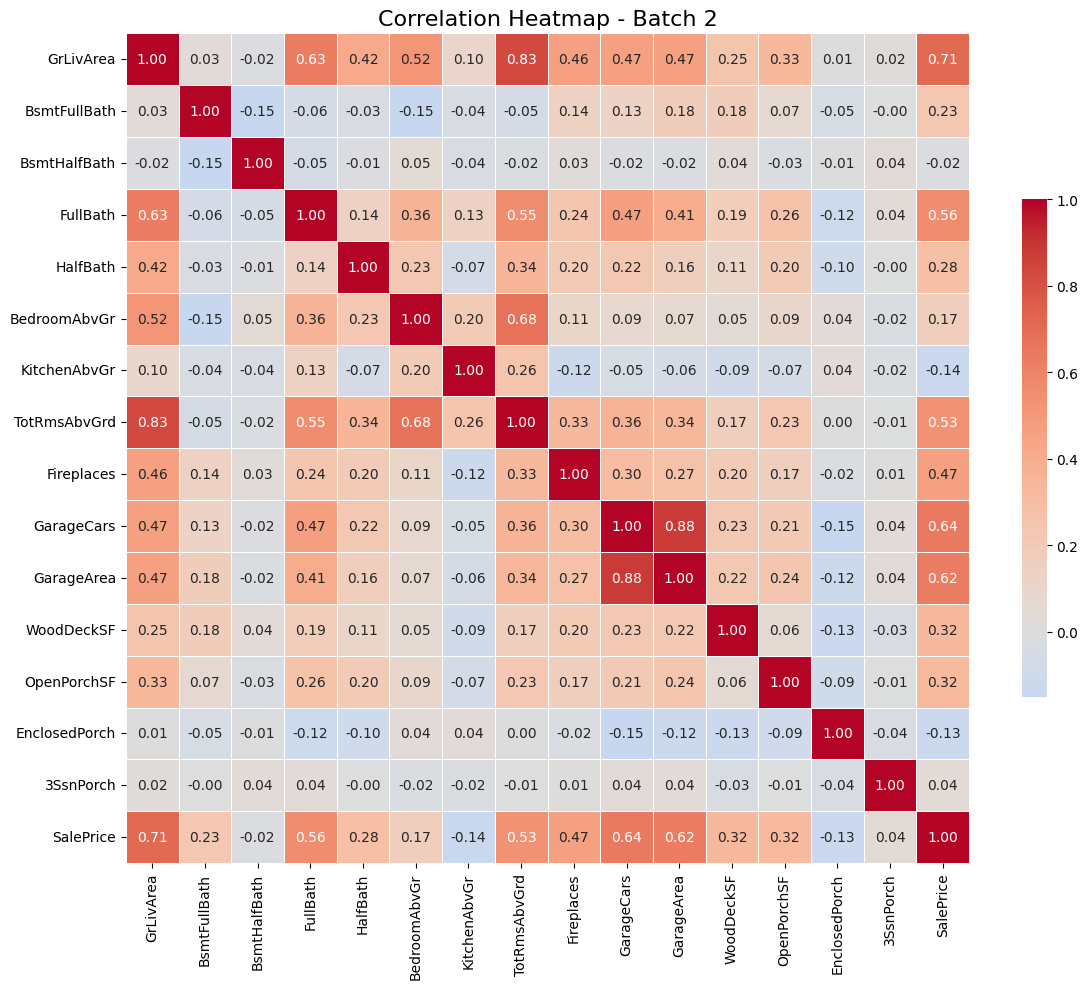

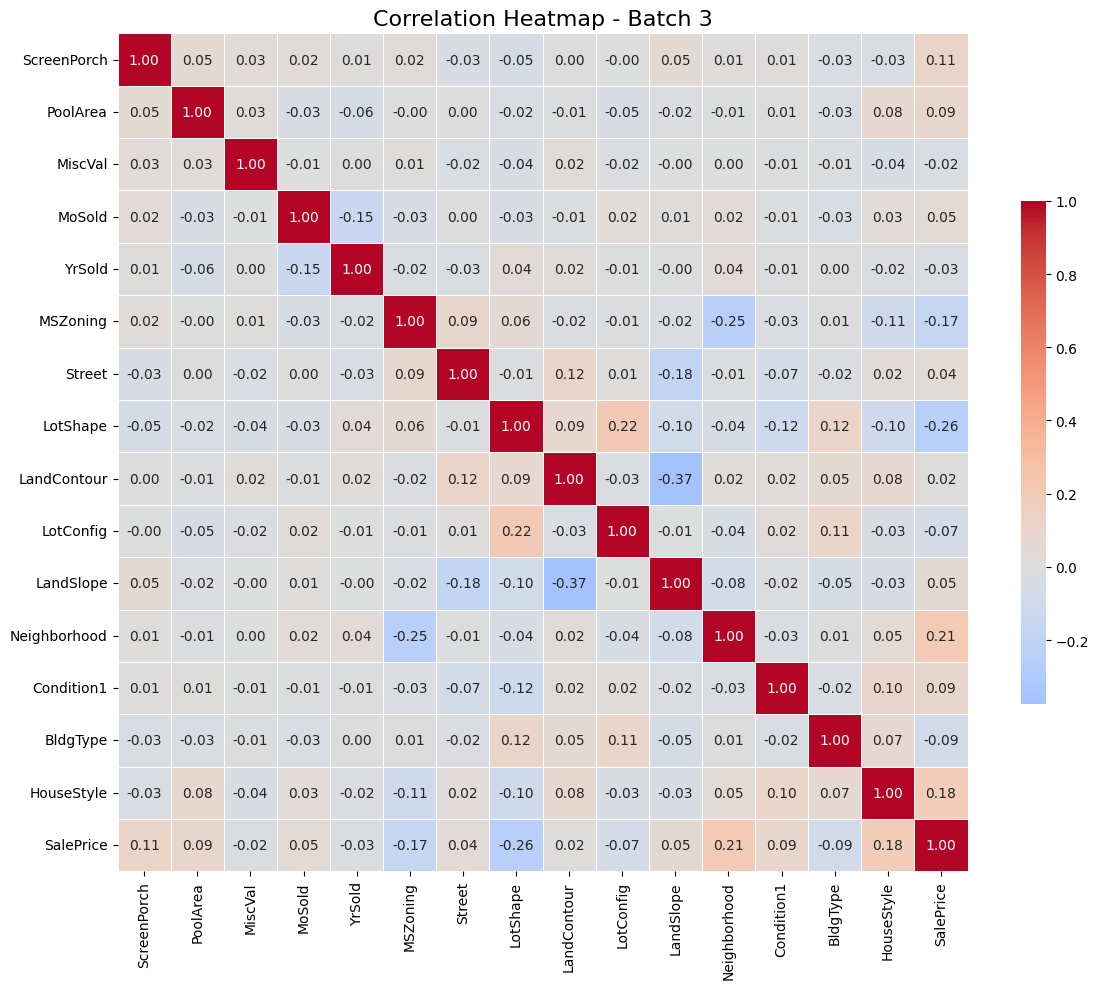

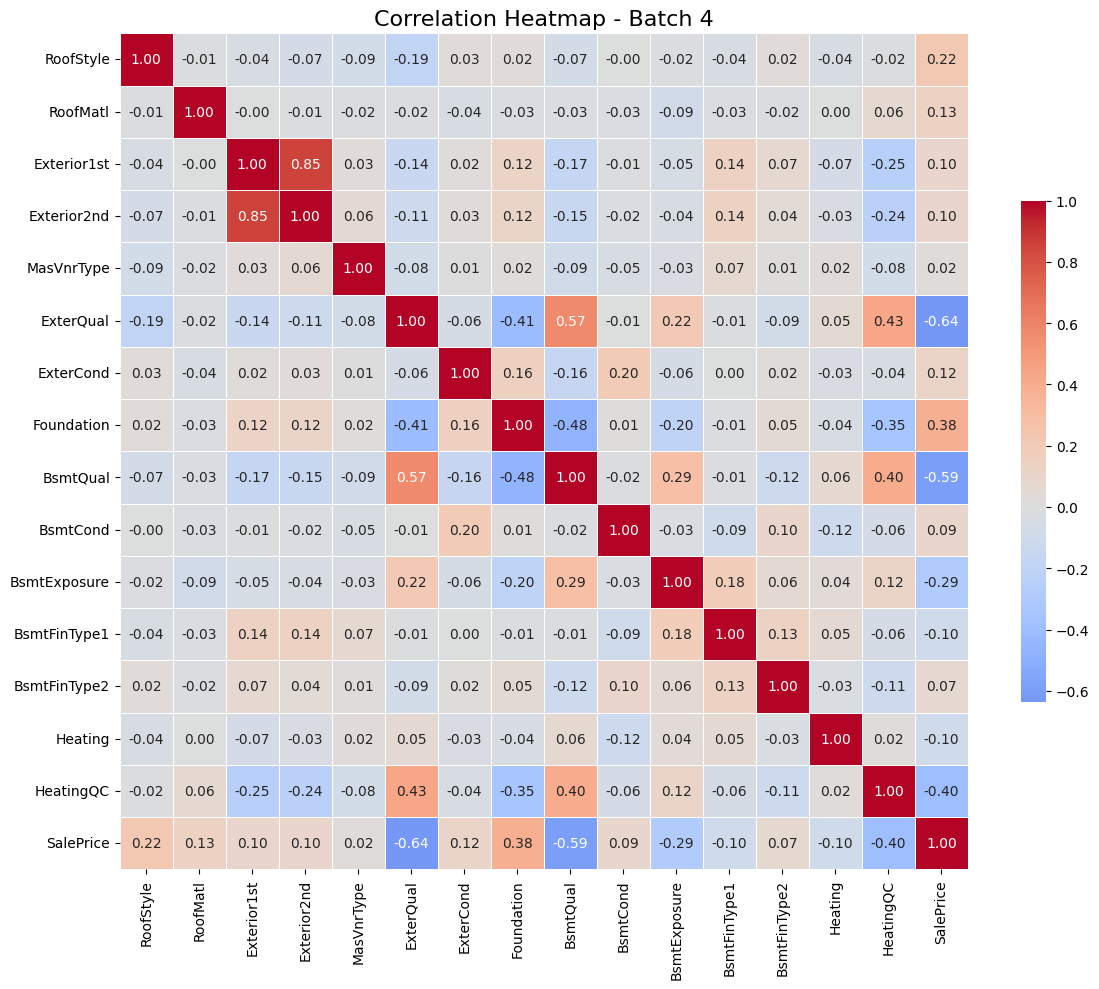

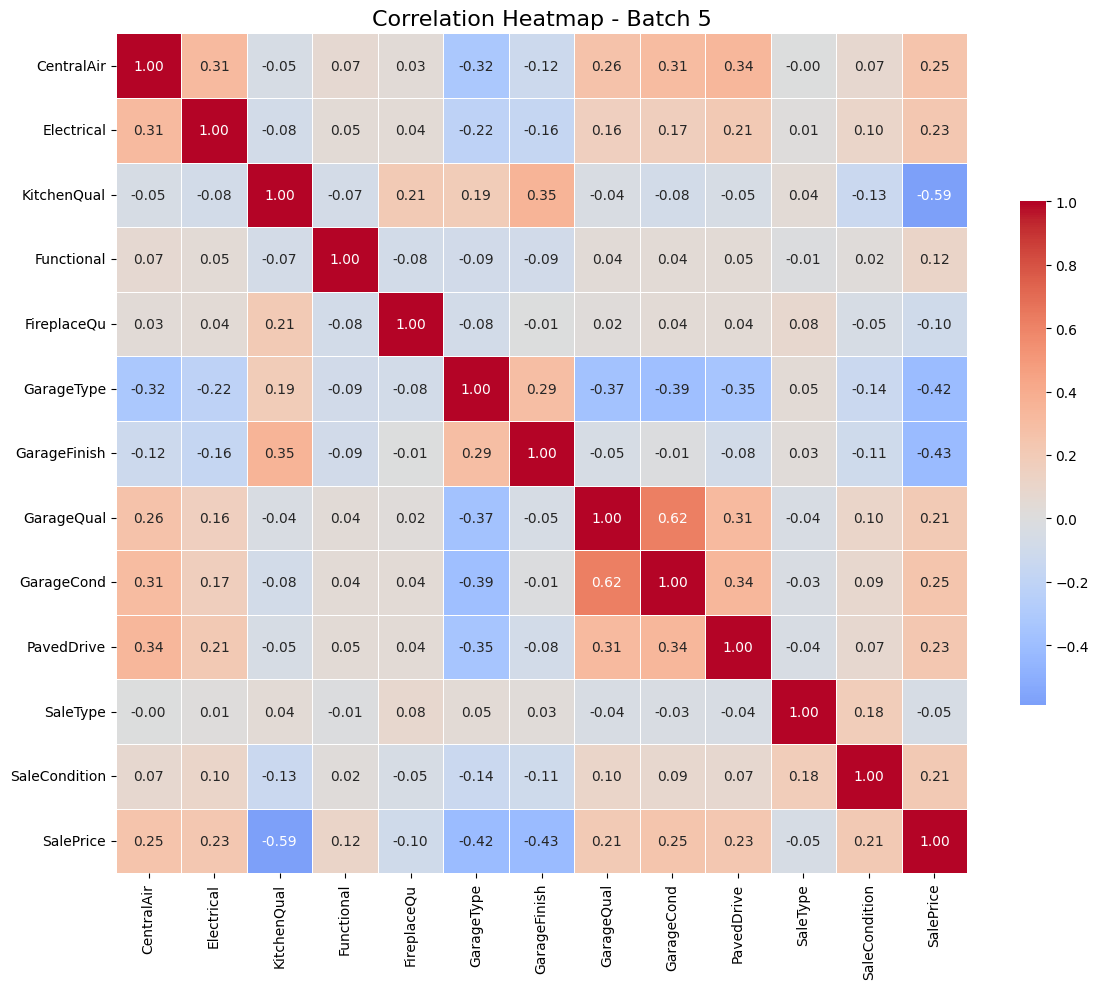

In [42]:
corr_matrix = train_transformed.corr(numeric_only=True)

features = [col for col in corr_matrix.columns if col != "SalePrice"]

batch_size = 15
feature_batches = [features[i:i + batch_size] for i in range(0, len(features), batch_size)]

for i, batch in enumerate(feature_batches, 1):
    cols_to_plot = batch + ['SalePrice']
    corr_subset = corr_matrix.loc[cols_to_plot, cols_to_plot]

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr_subset,
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        center=0,
        linewidths=0.5,
        cbar_kws={'shrink': 0.6}
    )
    plt.title(f'Correlation Heatmap - Batch {i}', fontsize=16)
    plt.tight_layout()
    plt.show()

In [43]:
# These are duplicated columns
cols_to_drop = ["Exterior2nd", "GarageCars", "TotRmsAbvGrd", "1stFlrSF"]
train_transformed = train_transformed.drop(cols_to_drop, axis=1)
test_transformed = test_transformed.drop(cols_to_drop, axis=1)

train_transformed.shape, test_transformed.shape

((1460, 69), (1459, 68))

## 3.5 Data Pipeline

# 4. Choose the model

## 4.1 Split the data

In [44]:
from sklearn.model_selection import train_test_split

X = train_transformed.drop(["SalePrice"], axis=1)
y = train_transformed["SalePrice"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1168, 68), (292, 68), (1168,), (292,))

## 4.2 Fit the models

In [45]:
from sklearn.linear_model import (
    LinearRegression,
    RidgeCV,
    LassoCV,
    ElasticNetCV,
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
)
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [47]:
models = {
    "LinearRegression": LinearRegression(),
    "RidgeCV": RidgeCV(),
    "LassoCV": LassoCV(),
    "ElasticNetCV": ElasticNetCV(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Bagging": BaggingRegressor(),
    "ExtraTrees": ExtraTreesRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)
}

cross_val_scores = {}
valid_scores = {}

for name, model in models.items():
    print(f"\n🔍 Model: {name}")

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    cross_val_scores[-scores.mean()] = model
    print(f"  CV RMSE Scores: {-scores}")
    print(f"  Mean CV RMSE: {-scores.mean():.4f}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    # Then take the square root to get RMSE
    rmse = np.sqrt(mse)
    valid_scores[rmse] = model
    print(f"  Validation RMSE: {rmse:.4f}")

print("\n" + "="*50)
print(min(cross_val_scores.keys()), cross_val_scores.get(min(cross_val_scores.keys())))
print(min(valid_scores.keys()), valid_scores.get(min(valid_scores.keys())))


🔍 Model: LinearRegression
  CV RMSE Scores: [37887.36751288 36587.08768782 52329.06718251 27816.32062415
 24245.85934225]
  Mean CV RMSE: 35773.1405
  Validation RMSE: 34375.1668

🔍 Model: RidgeCV
  CV RMSE Scores: [37759.80651113 36190.14016491 52175.63926862 27527.19332661
 24429.83862653]
  Mean CV RMSE: 35616.5236
  Validation RMSE: 34357.6880

🔍 Model: LassoCV
  CV RMSE Scores: [36156.88964134 34553.33301664 51718.03642695 26872.36277516
 29448.33856866]
  Mean CV RMSE: 35749.7921
  Validation RMSE: 35042.0464

🔍 Model: ElasticNetCV
  CV RMSE Scores: [76364.21987805 67223.07469685 79247.80487284 67122.93824511
 65288.83453464]
  Mean CV RMSE: 71049.3744
  Validation RMSE: 81090.8485

🔍 Model: DecisionTree
  CV RMSE Scores: [50169.9508445  48295.72912715 42670.71977724 38769.82414746
 35569.6907371 ]
  Mean CV RMSE: 43095.1829
  Validation RMSE: 44688.7733

🔍 Model: RandomForest
  CV RMSE Scores: [29822.327944   33756.31346892 36422.07028385 26149.30949292
 26166.57780489]
  Mean 

#### 💡 Chossing GradientBoostingRegressor Model.

# 5. Fine Tune GradientBoostingRegressor Model

## 5.1 Using GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(" GridSearch Best Params:", grid_search.best_params_)
print("GridSearch Best CV RMSE:", -grid_search.best_score_)

y_pred = grid_search.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(" GridSearch Validation RMSE:", rmse)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
 GridSearch Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
GridSearch Best CV RMSE: 28041.464874961945
 GridSearch Validation RMSE: 27082.86809854873


## 5.2 Using RandomSearchCV

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4)
}

random_search = RandomizedSearchCV(
    GradientBoostingRegressor(),
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

print("RandomSearch Best Params:", random_search.best_params_)
print("RandomSearch Best CV RMSE:", -random_search.best_score_)

y_pred = random_search.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(" RandomSearch Validation RMSE:", rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
RandomSearch Best Params: {'learning_rate': np.float64(0.05158833257363777), 'max_depth': 6, 'n_estimators': 409, 'subsample': np.float64(0.6125253169822235)}
RandomSearch Best CV RMSE: 27356.15429125572
 RandomSearch Validation RMSE: 26465.057089138052


# 6. Make Prediction on Test Data

In [52]:
best_model = grid_search.best_estimator_

best_model.fit(X, y)
y_pred = best_model.predict(X)

print(best_model)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"Train RMSE:, {rmse:.4f}")


GradientBoostingRegressor(max_depth=5, n_estimators=200, subsample=0.8)
Train RMSE:, 3953.7132


In [53]:
test_preds = best_model.predict(test_transformed)

Predicted = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_preds
})
Predicted.to_csv("Predicted.csv", index=False)

In [54]:
Predicted.head()

,Id,SalePrice
0,1461,126658.178721
1,1462,158474.778092
2,1463,184181.641916
3,1464,195416.123357
4,1465,186163.871031
